## Chapter 12: kNN

Trying to predict how I'm going to vote in next presidential election. If you know nothing else about me (+ if you have the data), 1 sensible approach = look @ how my neighbors are planning to vote. 

Ex: Downtown Seattle, = invariably planning to vote Democrat, which suggests “Democrat” =  good guess for me as well.

Now imagine you know *more* about me than just geography = age, income, # of kids, etc. To the extent my behavior is influenced/characterized by those things, looking just @ neighbors who are *close to me among all those dimensions* seems likely to be an even better predictor than looking @ all neighbors = **nearest neighbors classification.**

### The Model

Nearest neighbors = 1 of the simplest predictive models there is as it *makes no
mathematical assumptions* + doesn’t require any sort of heavy machinery. 

Only things it requires are:

* Some notion of distance
* Assumption that DP's that're close to one another = similar

Many techniques look @ the data set *as a whole* in order to learn patterns in the data. Nearest neighbors, on the other hand, *consciously neglects a lot of info*, since the prediction for *each new point depends only on the handful of DPs closest to it*.

What’s more, nearest neighbors is probably *NOT* going to help understand drivers
of whatever phenomenon you’re looking at. Predicting votes based on neighbors’ votes doesn’t tell you much about what causes me to vote the way I do, whereas some alternative model that predicted vote based on income + marital status, for example, very well might.

Generally, we have some DPs + a corresponding set of labels (could be T/F or categories). In our case, the DPs = vectors, which means we can use `distance`

In [1]:
def vector_subtract(v,w):
    """Adds corresponding elements"""
    return[v_i - w_i
          for v_i, w_i in zip(v,w)]

# perform dot product = sum of component-wise products
def dot_prod(v,w):
    # for each component in vectors the zip list, multiply it by the
    # corresponding-indexed element in the other vectors in the zipped list
    return sum(v_i*w_i           
              for v_i,w_i in zip(v,w))

## use dot product to easily compute SUM OF SQUARES of a vector
def vector_SS(v):
    """v1*v1 + ... + vn*vn"""
    return dot_prod(v,v)

## compute distance between 2 vectors == sqrt[(v1 - w1)**2 + ... + (vn-wn)**2]
def squared_distance(v,w):
    # get squared distance from each element-wise difference
    return vector_SS(vector_subtract(v,w))

def distance(v,w):
    from math import sqrt
    
    return sqrt(squared_distance(v,w))

Let’s say we’ve picked 3 for `k` + we want to classify some new DP, so we find the `k` nearest labeled DPs + let them vote on the new output. To do this, we’ll need a function that counts votes. One possibility is:

In [2]:
def raw_majority_vote(labels):
    from collections import Counter
    
    votes = Counter(labels)
    # get most common (1) label + grab 1st element in tupel = the label itself [0]
    winner, _ = votes.most_common(1)[0]
    return winner

But this doesn’t do anything intelligent w/ ties. 

* Ex: Rating movies + the 5 nearest movies are rated: {G, G, PG, PG, R}. 
* G + PG have 2 votes, so we have several options:
    * Pick 1 of the winners at random.
    * Weight votes by distance + pick the *weighted winner*
    * Reduce k until we find a unique winner
    
Implement the third:

In [3]:
# if tie, reduce k until unique winner found
def majority_vote(labels):
    """Assumes labels are ordered from nearest to farthest"""
    from collections import Counter
    
    vote_counts = Counter(labels)
    # get most common (1) label + grab 1st element in tupel = the label itself [0]
    winner, winner_count = vote_counts.most_common(1)[0]
    
    # grab number of labels whose count = the most common count (highest count)
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    
    # if only 1 winner (unique), return
    # if not, decrease k (remove farthest neighbor) and repeat process
    if num_winners == 1:
        return winner
    else: 
        return majority_vote(labels[:-1])

This approach is sure to work eventually, since in the worst case we go all the way down
to just 1 label, at which point that 1 label wins. With this function it’s easy to create a classifier:

In [4]:
def knn_classify(k,labeled_points,new_point):
    """Each labeled point shuold be a pair = (point, label)"""
    # Order labeled points from nearest to farthest from given new point
    by_distance = sorted(labeled_points,
                         key = lambda point_label: distance(point_label[0], new_point))
    
    # Find labels for k closest
    knn_labels = [label for _, label in by_distance[:k]]
    
    # Let them vote
    return majority_vote(knn_labels)

### Example: Favorite Languages

Results of the 1st user survey are back, + we’ve found preferred programming languages of users in a # of large cities and their latitude + longitude

In [5]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

VP of Community Engagement wants to know if we can use these results to predict favorite programming languages for places that weren’t part of our survey. As usual, good 1st step = plotting the data

In [6]:
import re
import matplotlib.pyplot as plt

segments = []
points = []

# set regex to search for latitude and longitude values
lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

# read in XML of state borders
with open("states.txt", "r") as f:
    lines = [line for line in f]

# for each line in the XML file, 
for line in lines:
    # if the line start with state (<state name ="Arkansas"....)
    if line.startswith("<state"):
        #print(line)
        # grab the lat + long points from current line + append to segments list
        for p1, p2 in zip(points, points[1:]):
            #print(p1)
            segments.append((p1, p2))
        # reset points list
        points = []
    # search for points in the line
    s = re.search(lat_long_regex, line)
    # if found, get the groups and set as latitude + longitude points
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color="#000000")
        
plot_state_borders()

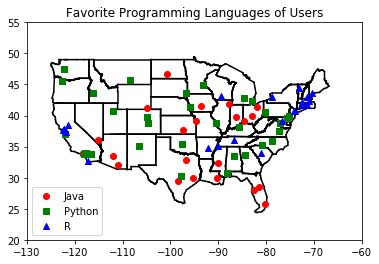

In [7]:
%matplotlib inline

from matplotlib import pyplot as plt

# make dict w/ key = language, value = a pair = (lat,long)
plots = {"Java": ([],[]), "Python": ([],[]), "R":([],[])}

# want each language to have different plot marker
markers = {"Java":"o", "Python":"s", "R":"^"}
colors = {"Java":"r", "Python":"g", "R":"b"}

for (longitude, latitude), language in cities:
    #print(longitude)
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# create scatterplot series for each language
for language, (x,y) in plots.items():
    plt.scatter(x,y,color=colors[language],marker=markers[language],
               label=language,zorder=10)

plot_state_borders() # pretend to have function to draw state lines
plt.legend(loc=0) # matplotlib chooses location
plt.axis([-130,-60,20,55]) # set axes limits
plt.title("Favorite Programming Languages of Users")
plt.show()

In [8]:
#plot_state_borders() # pretend to have function to draw state lines

`plot_state_borders()` = function not actually defined.

1. Search the Web for something like state boundaries latitude longitude.
2. Convert whatever data you can find into a list of segments [(long1, lat1), (long2, lat2)].
3. Use plt.plot() to draw the segments.

It looks like nearby places tend to like the same language, so kNN seems like a reasonable choice for a predictive model. To start with, let’s look at what happens if we try to predict each city’s preferred language using its neighbors other than itself

In [9]:
for k in [1,3,5,7]:
    num_correct = 0
    
    for city in cities:
        (longitude, latitude), actual_language = city
        #print(city)
        location = (longitude,latitude)
        #print(location)
        other_cities = [other_city for other_city in cities if other_city != city]
        
        predicted_langauge = knn_classify(k,other_cities,location)
        
        if predicted_langauge == actual_language:
            num_correct += 1
    
    print(k, "neighbors[s]: ", num_correct, "correct our of ", len(cities),
         "or, ", num_correct/len(cities)*100, "%")

1 neighbors[s]:  40 correct our of  75 or,  53.333333333333336 %
3 neighbors[s]:  44 correct our of  75 or,  58.666666666666664 %
5 neighbors[s]:  41 correct our of  75 or,  54.666666666666664 %
7 neighbors[s]:  35 correct our of  75 or,  46.666666666666664 %


Looks like `k` = 3 nearest neighbors performs best, giving correct result ~59% of the time. Now we can look # what regions would get classified to which languages under each
nearest neighbors scheme by classifying an entire grid worth of points + then plotting them as we did the cities:

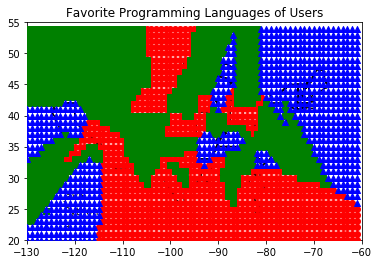

In [10]:
# make dict w/ key = language, value = a pair = (lat,long)
plots = {"Java": ([],[]), "Python": ([],[]), "R":([],[])}

# want each language to have different plot marker
markers = {"Java":"o", "Python":"s", "R":"^"}
colors = {"Java":"r", "Python":"g", "R":"b"}

k = 1 # or 3, or 5, ...

for longitude in range(-130,-60):
    for latitude in range(20,55):
        predicted_language = knn_classify(k,cities,[longitude,latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create scatterplot series for each language
for language, (x,y) in plots.items():
    plt.scatter(x,y,color=colors[language],marker=markers[language],
               label=language,zorder=10)

plot_state_borders() # pretend to have function to draw state lines
plt.legend(loc=0) # matplotlib chooses location
plt.axis([-130,-60,20,55]) # set axes limits
plt.title("Favorite Programming Languages of Users")
plt.show()

See lots of abrupt changes from 1 language to another w/ sharp boundaries. As we increase k, we'd see smoother regions for each language

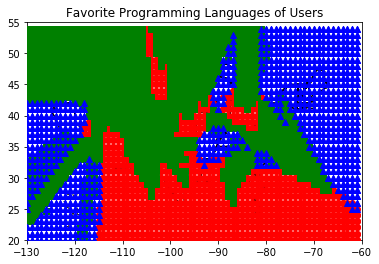

In [11]:
k = 3 # or 3, or 5, ...

for longitude in range(-130,-60):
    for latitude in range(20,55):
        predicted_language = knn_classify(k,cities,[longitude,latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create scatterplot series for each language
for language, (x,y) in plots.items():
    plt.scatter(x,y,color=colors[language],marker=markers[language],
               label=language,zorder=10)

plot_state_borders() # pretend to have function to draw state lines
plt.legend(loc=0) # matplotlib chooses location
plt.axis([-130,-60,20,55]) # set axes limits
plt.title("Favorite Programming Languages of Users")
plt.show()

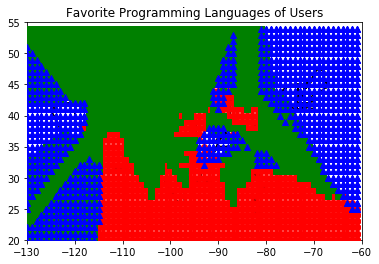

In [12]:
k = 5 # or 3, or 5, ...

for longitude in range(-130,-60):
    for latitude in range(20,55):
        predicted_language = knn_classify(k,cities,[longitude,latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create scatterplot series for each language
for language, (x,y) in plots.items():
    plt.scatter(x,y,color=colors[language],marker=markers[language],
               label=language,zorder=10)

plot_state_borders() # pretend to have function to draw state lines
plt.legend(loc=0) # matplotlib chooses location
plt.axis([-130,-60,20,55]) # set axes limits
plt.title("Favorite Programming Languages of Users")
plt.show()

For this example, our dimensions are roughly comparable, but if not, we might want to
rescale the data.

### The Curse of Dimensionality

kNN runs into trouble w/ higher dimensions. High-dimensional spaces = vast, so DPs in high-dimensional spaces tend not to be close to one another at all (**sparse**). 1 way to
see this = randomly generating pairs of points in the d-dimensional “unit cube” in a
variety of dimensions, and calculating the distances between them

In [13]:
# generate random points for specified dimension
def random_point(dim):
    import random
    return [random.random() for _ in range(dim)]

# write function to generate distance
def random_distances(dim,num_pairs):
    return [distance(random_point(dim), random_point(dim))
           for _ in range(num_pairs)]

For every dim from 1-100, compute 10k distances + use those to compute the *average distance* between DPs + the minimum distance between DPs in each dimension

In [14]:
import random
def mean(x):
    return sum(x) / len(x)

dimensions = range(1,101)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
    distances = random_distances(dim,10000) # 10k random pairs
    avg_distances.append(mean(distances))
    min_distances.append(min(distances))

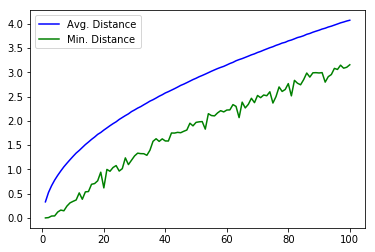

In [15]:
plt.plot(dimensions,avg_distances,color="b",label="Avg. Distance")
plt.plot(dimensions,min_distances,color="g",label="Min. Distance")
plt.legend(loc=0) # matplotlib chooses location
plt.show()

As # of dimensions increases, average distance between DPs increases + the ratio between closest + average distance (more problematic)

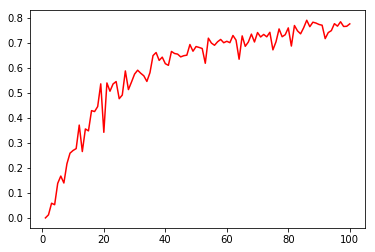

In [16]:
min_avg_ratio = [min_dist/avg_dist 
                for min_dist,avg_dist in zip(min_distances,avg_distances)]

plt.plot(dimensions,min_avg_ratio,color="r")
plt.show()

In low-dimensional data sets, closest points tend to be much closer than average. But
**2 DPs are close only if they’re close in *EVERY* dimension**, + every extra dimension (even if just noise) = another opportunity for each DP to be further away from every other DP.

W/ a lot of dimensions, it’s likely that the closest DPs aren’t much closer than average, which means 2 DPs being close doesn’t mean very much (unless there’s a lot of structure in your data that makes it behave as if it were much lower-dimensional).

A different way of thinking about the problem involves **sparsity** of higher-dimensional
spaces. If you pick 50 random #'s between 0-1, you’ll probably get a pretty good sample
of the unit interval. If you pick 50 random points in the unit square, you’ll get less coverage, + in 3D less still

Can see that large empty spaces w/ no DPs near them would start to appear in higher dims (unless we get exponentially more data), + these those large empty spaces represent regions far from all the DPs you want to use in predictions.

So if trying to use nearest neighbors in higher dimensions, it’s probably a good idea
to do some kind of dimensionality reduction first.

In [17]:
#dps = [random.random() for _ in range(1,51)]
#plt.plot(dps)

In [18]:
#distances = (random_point(dim), random_point(dim)
#print(distances)
#plt.scatter(distances[0],distances[1])